### Introduction:
This project analyzes and visualizes election data to understand the electoral performance of various political parties and candidates. The data comprises information about constituencies, leading and trailing parties, candidates, and their vote margins. By cleaning and merging multiple datasets, we explore key insights such as the number of seats won, vote distribution, party performance comparisons, and trends in vote margins. Through various visualizations (bar charts, pie charts, and histograms), we aim to provide a comprehensive view of election outcomes, focusing on party dominance, leading candidates, and regional trends across different states.

In [21]:
# Import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Load the data from CSV
data = pd.read_csv('election_data.csv')
constituency_state_mapping = pd.read_csv('Constituency_State.csv', encoding='windows-1252')

# Merge the datasets on 'Constituency'
merged_data = pd.merge(data, constituency_state_mapping, on='Constituency', how='left')

# Convert 'Margin' to numeric for analysis
data['Margin'] = pd.to_numeric(data['Margin'], errors='coerce')
merged_data['Margin'] = pd.to_numeric(merged_data['Margin'], errors='coerce').fillna(0)

In [23]:
data.head(10)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991.0,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282.0,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036.0,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794.0,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559.0,Result Declared
5,ARANI,12,THARANIVENTHAN M S,Dravida Munnetra Kazhagam,"GAJENDRAN, G.V.",All India Anna Dravida Munnetra Kazhagam,208766.0,Result Declared
6,Adilabad,1,GODAM NAGESH,Bharatiya Janata Party,ATHRAM SUGUNA,Indian National Congress,90652.0,Result Declared
7,Agra,18,PROF S P SINGH BAGHEL,Bharatiya Janata Party,SURESH CHAND KARDAM,Samajwadi Party,271294.0,Result Declared
8,Ahmedabad East,7,HASMUKHBHAI PATEL (H.S.PATEL),Bharatiya Janata Party,HIMMATSINH PRAHLADSINH PATEL,Indian National Congress,461755.0,Result Declared
9,Ahmedabad West,8,DINESHBHAI MAKWANA (ADVOCATE),Bharatiya Janata Party,BHARAT YOGENDRA MAKWANA,Indian National Congress,286437.0,Result Declared


In [24]:
data.shape

(543, 8)

In [25]:
data.isnull().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                1
Status                0
dtype: int64

In [26]:
data= data.dropna()

In [27]:
# Verify cleaned data
print(data.info()) 
print(data['Leading Party'].value_counts())   

<class 'pandas.core.frame.DataFrame'>
Index: 542 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Constituency        542 non-null    object 
 1   Const. No.          542 non-null    int64  
 2   Leading Candidate   542 non-null    object 
 3   Leading Party       542 non-null    object 
 4   Trailing Candidate  542 non-null    object 
 5   Trailing Party      542 non-null    object 
 6   Margin              542 non-null    float64
 7   Status              542 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 38.1+ KB
None
Leading Party
Bharatiya Janata Party                                      239
Indian National Congress                                     99
Samajwadi Party                                              37
All India Trinamool Congress                                 29
Dravida Munnetra Kazhagam                                    22
Telugu De

In [28]:
# Party with highest and lowest margin of victory 
highest_margin = data.loc[data['Margin'].idxmax()] # Get the row with the maximum margin
print("Candidate with the highest margin of victory:", highest_margin)
lowest_margin = data.loc[data['Margin'].idxmin()] # Get the row with the minimum margin
print("Candidate with the lowest margin of victory:", lowest_margin)


Candidate with the highest margin of victory: Constituency                               INDORE
Const. No.                                     26
Leading Candidate                 SHANKAR LALWANI
Leading Party              Bharatiya Janata Party
Trailing Candidate    SANJAY S/O LAKSHMAN SOLANKI
Trailing Party                Bahujan Samaj Party
Margin                                  1175092.0
Status                            Result Declared
Name: 221, dtype: object
Candidate with the lowest margin of victory: Constituency                              Mumbai North West
Const. No.                                               27
Leading Candidate                  RAVINDRA DATTARAM WAIKAR
Leading Party                                     Shiv Sena
Trailing Candidate                    AMOL GAJANAN KIRTIKAR
Trailing Party        Shiv Sena (Uddhav Balasaheb Thackrey)
Margin                                                 48.0
Status                                      Result Declared
Name

# 1. Number of seats won by each party 

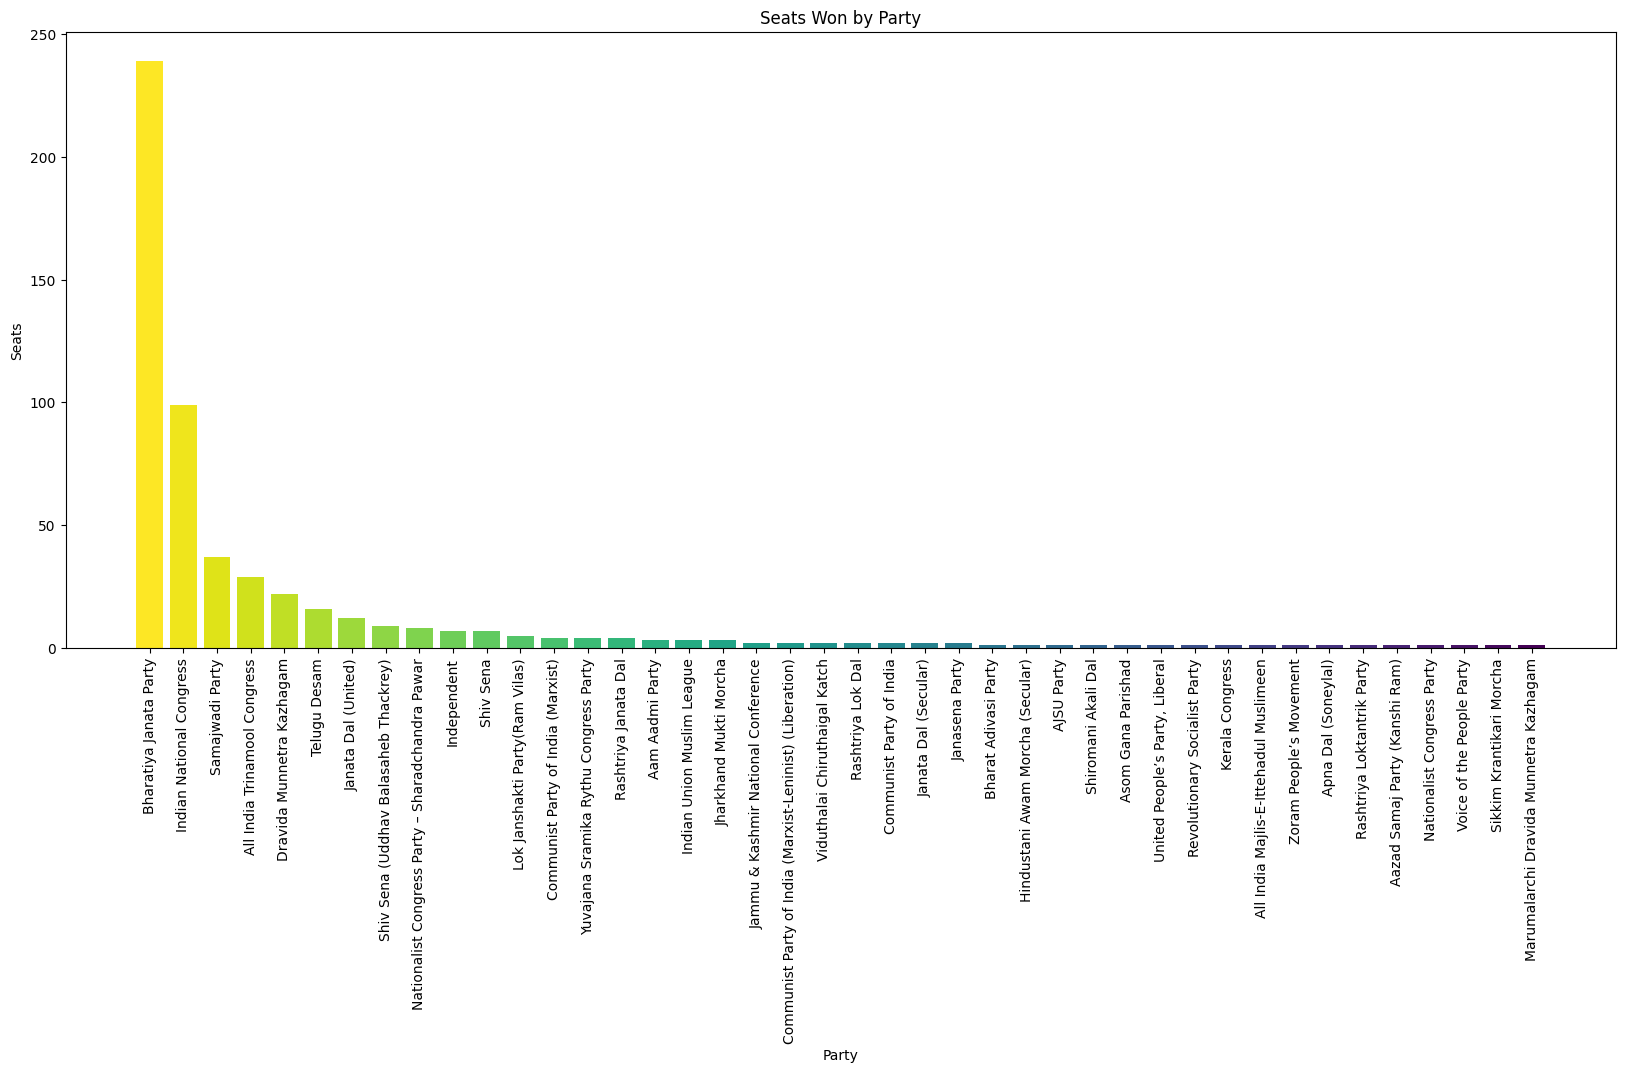

In [29]:
# Count the occurrences of each unique value in the Leading Party
seats_won = data['Leading Party'].value_counts() 

# Plot the number of seats won by each party
plt.figure(figsize=(20, 8))
plt.bar(seats_won.index, seats_won.values, color=plt.cm.viridis_r(np.linspace(0, 1, len(seats_won)))) 
plt.title('Seats Won by Party')
plt.xlabel('Party')
plt.ylabel('Seats')
plt.xticks(rotation=90)
plt.show()

Inference:   
The bar chart illustrates the number of seats won by each party, highlighting the distribution of seat victories across different parties.

# 2. Votes distribution by party 

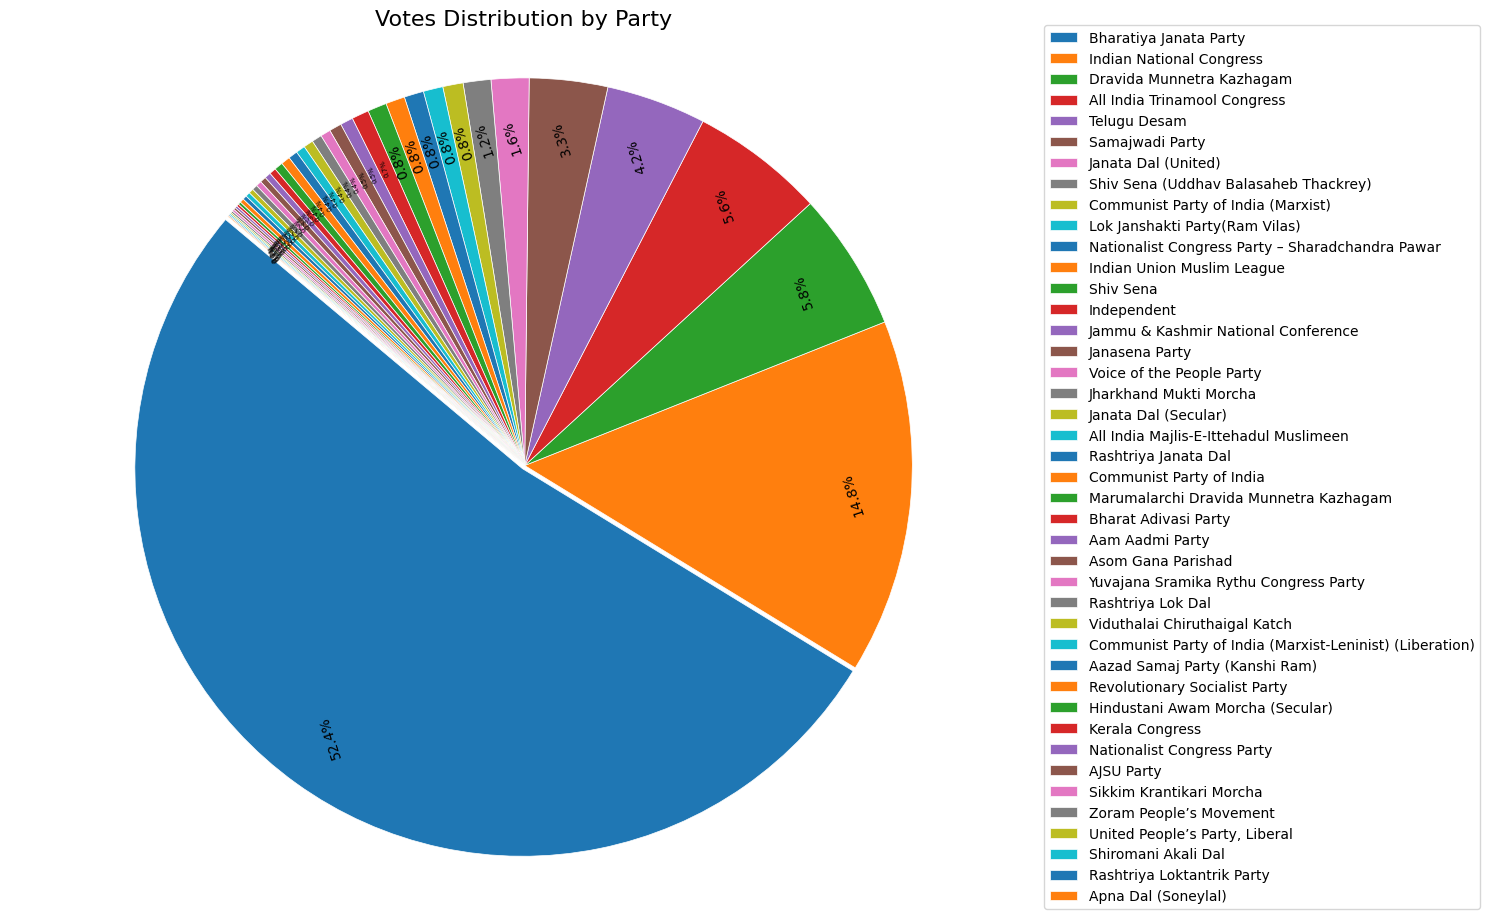

In [30]:
# Calculate data for the pie chart
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 10))

# Calculate the angles and start positions
startangle = 140 
explode = [0.01 if i == 0 else 0 for i in range(len(party_votes))] 

# Create the pie slices 
wedges, texts, autotexts = plt.pie(
    party_votes,
    autopct='%1.1f%%', 
    startangle= startangle,
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.5},  
    pctdistance=0.85,   
    explode=explode,  
)

# Customize percentage text 
for autotext in autotexts:
    pct_value = float(autotext.get_text().strip('%'))  
    if pct_value < 0.8:  # Adjust font size for small slices
        autotext.set_fontsize(5)
    else:
        autotext.set_fontsize(10)
    autotext.set_color('black')  
    autotext.set_rotation(108)  
    autotext.set_verticalalignment('center')  

plt.title('Votes Distribution by Party', fontsize=16, pad=10)

# Maintain equal aspect ratio for a circular pie chart
plt.axis('equal')

# Add a legend outside the pie chart
plt.legend(wedges, party_votes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')

# Show the plot
plt.tight_layout()
plt.show()


Inference:    
The pie chart displays the distribution of votes by party, with adjusted text size for smaller slices and a legend for easy identification of each party's share.

# 3. Highest and Lowest Victory Candidate 

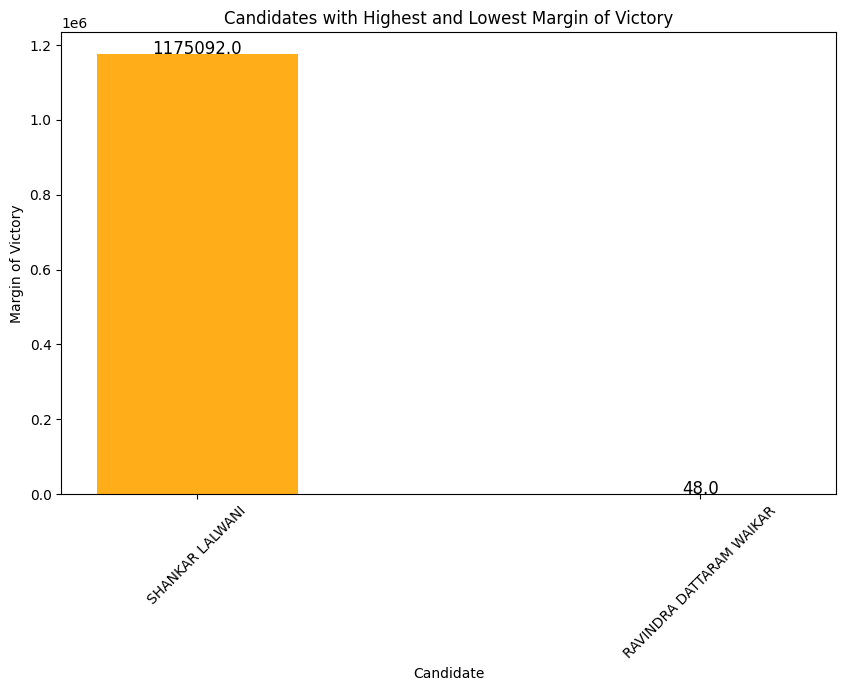

In [31]:
highest_margin_entry = data.loc[data['Margin'].idxmax()]
lowest_margin_entry = data.loc[data['Margin'].idxmin()]

data_to_plot = pd.DataFrame({
    'Candidate': [highest_margin_entry['Leading Candidate'], lowest_margin_entry['Leading Candidate']],
    'Party': [highest_margin_entry['Leading Party'], lowest_margin_entry['Leading Party']],
    'Margin': [highest_margin_entry['Margin'], lowest_margin_entry['Margin']]
})

plt.figure(figsize=(10, 6))
plt.bar(data_to_plot['Candidate'], data_to_plot['Margin'], color=['orange', 'red'], alpha=0.9, width= 0.4)
for i, value in enumerate(data_to_plot['Margin']):
    plt.text(i, value + 0.05, str(value), ha='center', fontsize=12)
plt.title('Candidates with Highest and Lowest Margin of Victory')
plt.xlabel('Candidate')
plt.ylabel('Margin of Victory')
plt.xticks(rotation=45)
plt.show()

Inference:   
The bar chart highlights the candidates with the highest and lowest margin of victory, showcasing the extremes in electoral performance.

# 4. Histogram for vote margin distribution

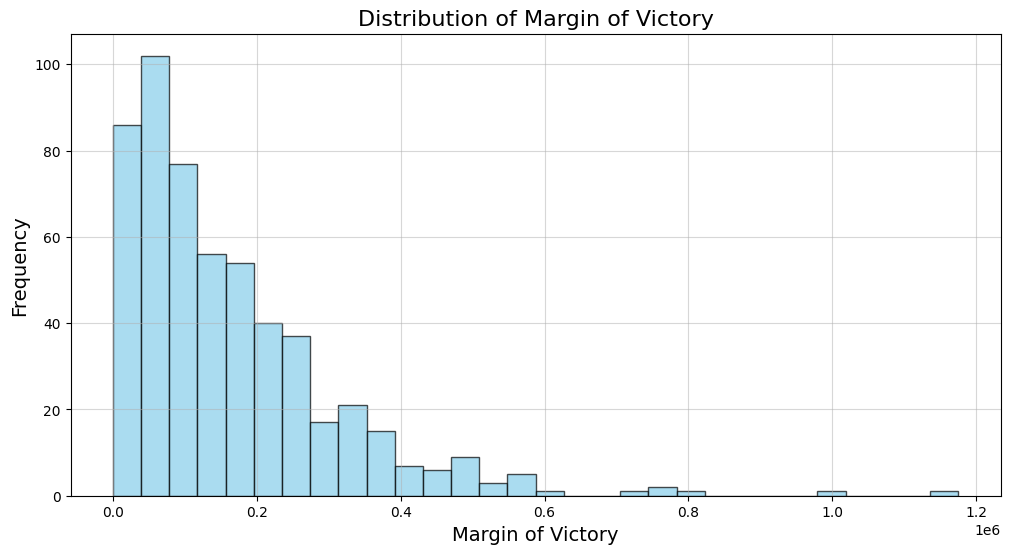

In [32]:
plt.figure(figsize=(12, 6))
plt.hist(data['Margin'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Margin of Victory', fontsize=16)
plt.xlabel('Margin of Victory', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, alpha=0.5)
plt.show()


Inerence:   
The histogram reveals the distribution of victory margins, showing how frequently different ranges of margins occur, with most victories clustered around smaller margins.

# 5. Top 10 leading parties by votes 

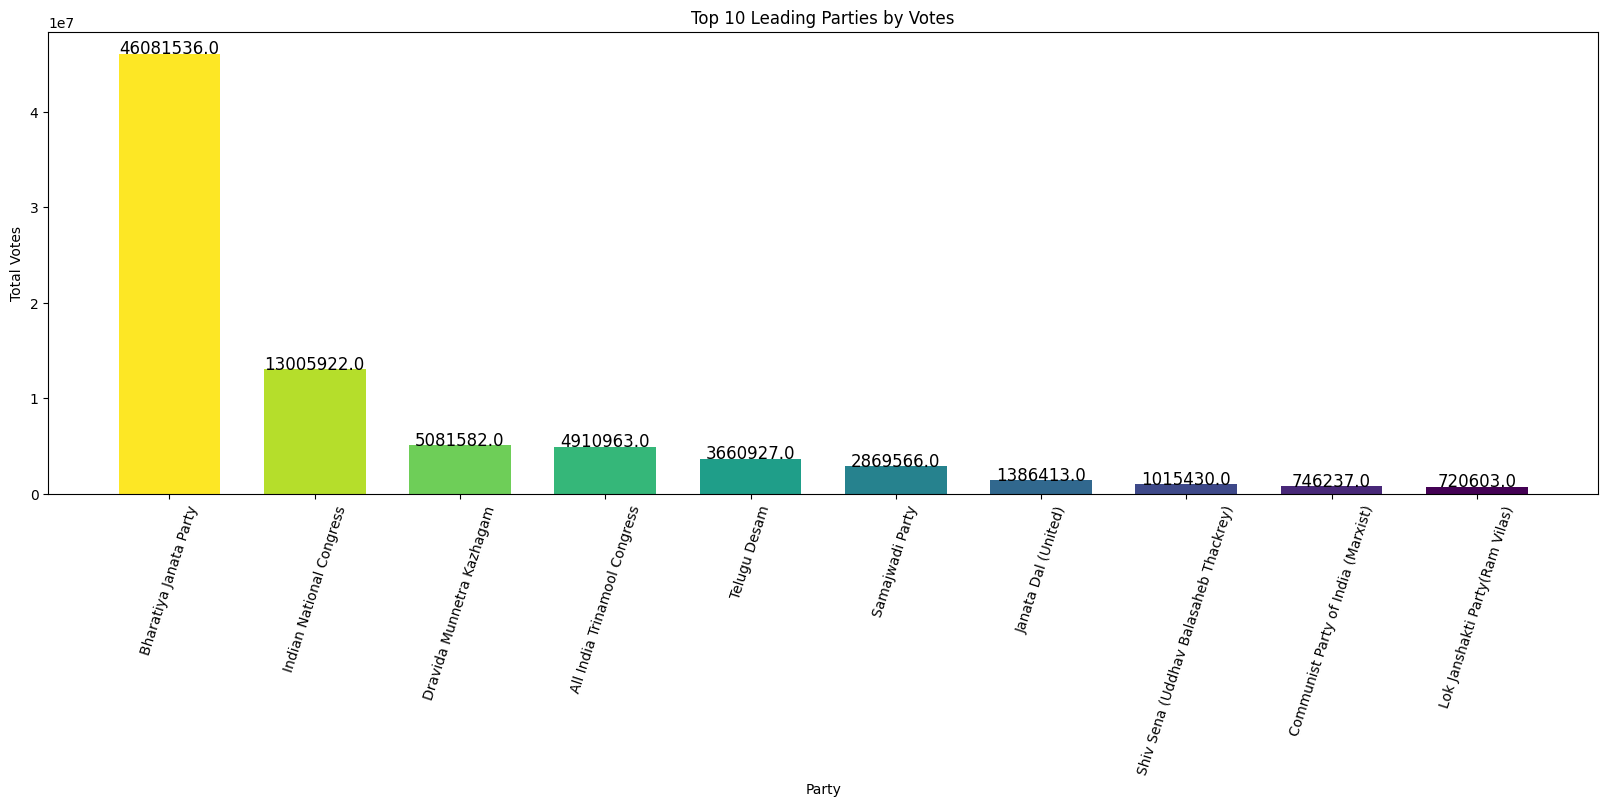

In [33]:
# Calculate the Total Votes for Each Party
leading_party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False).head(10)
leading_party_seats = data['Leading Party'].value_counts() 

# Create a Bar Chart by Total Votes
plt.figure(figsize=(20, 6))
plt.bar(leading_party_votes.index, leading_party_votes.values, width=0.7, color=plt.cm.viridis_r(np.linspace(0, 1, len(leading_party_votes))))
for i, value in enumerate(leading_party_votes.values):
    plt.text(i, value + 0.05, str(value), ha='center', fontsize=12)
plt.title('Top 10 Leading Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation= 72)

plt.show()

Inference:   
The bar chart illustrates the top 10 leading parties by total vote margin, emphasizing the parties with the highest vote totals in the dataset.

# 6. Top 10 trailing parties by votes

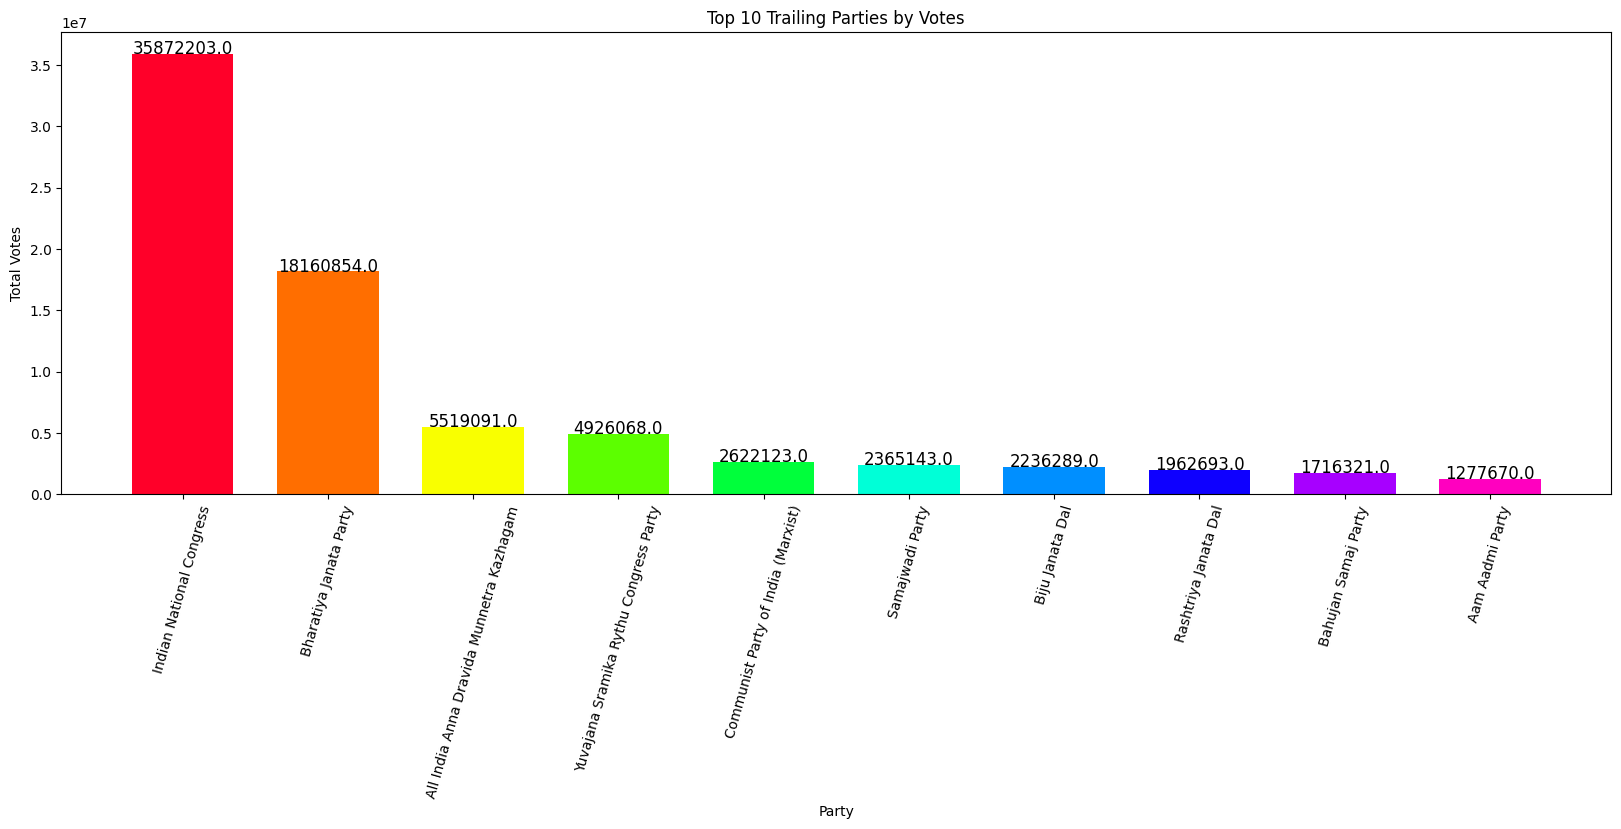

In [34]:
# Calculate the Total Votes for Each Trailing Party
trailing_party_votes = data.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False).head(10)

# Create a Bar Chart for Trailing Parties
plt.figure(figsize=(20, 6))
plt.bar(trailing_party_votes.index, trailing_party_votes.values, width= 0.7, color=plt.cm.gist_rainbow(np.linspace(0, 1, len(trailing_party_votes))))
for i, value in enumerate(trailing_party_votes.values):
    plt.text(i, value + 0.05, str(value), ha='center', fontsize=12)
plt.title('Top 10 Trailing Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=74)

plt.show()

Inference:  
    The code visualizes the total votes of the top 10 trailing parties in a bar chart, sorted by the highest vote margin.

# 7. Top 10 leading parties by seats 

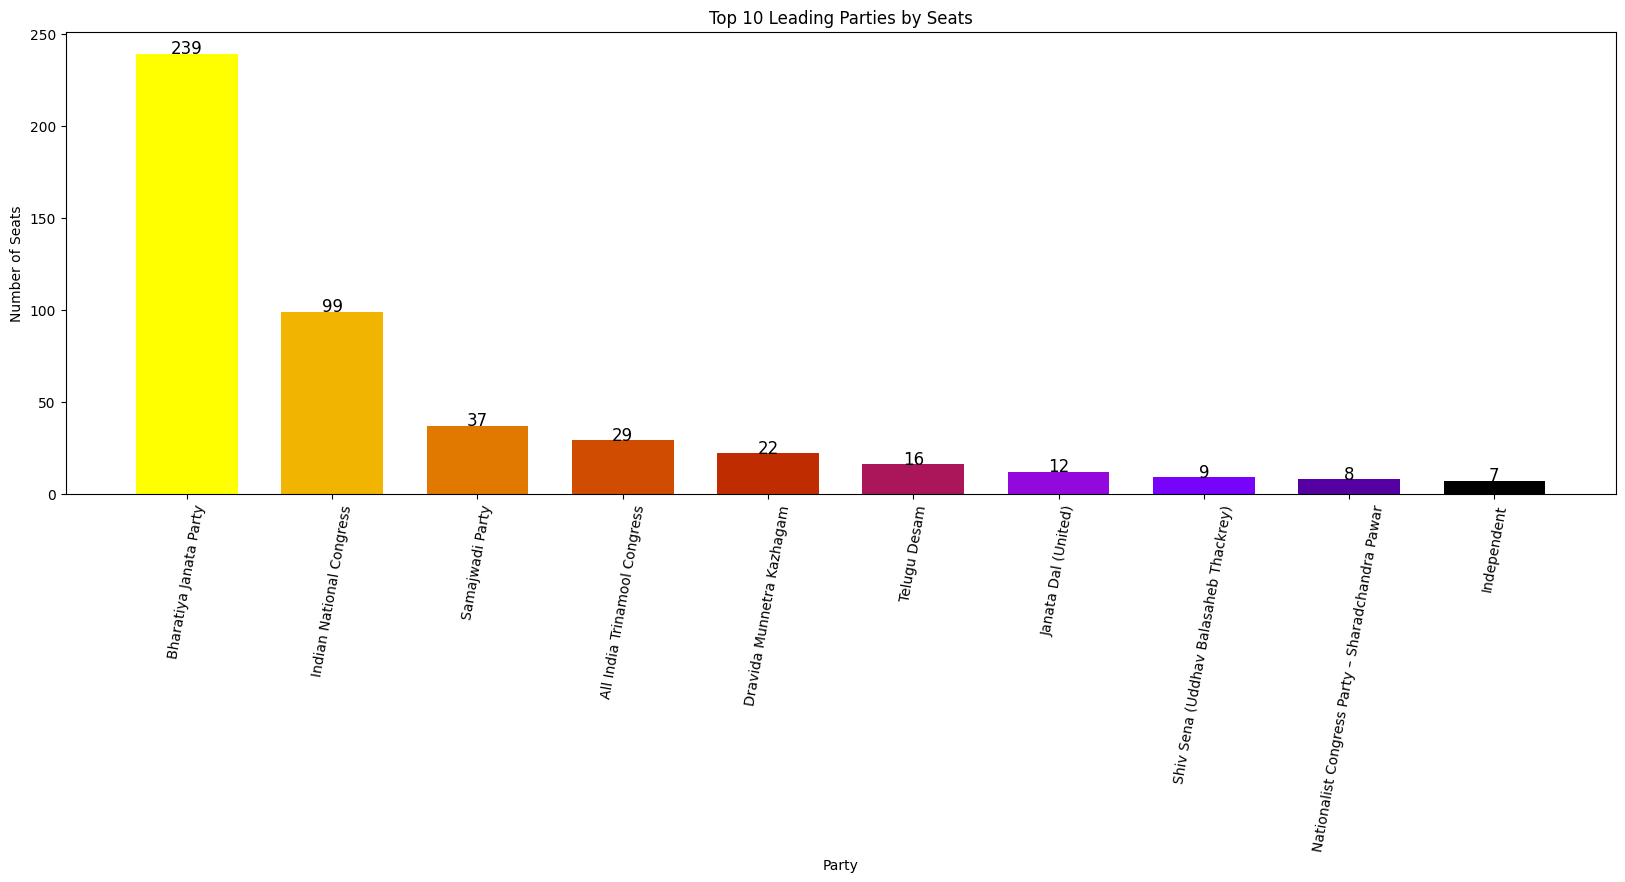

In [35]:
# Calculate the Number of Seats Won by Each Party
leading_party_seats = data['Leading Party'].value_counts().head(10)

# Create a Bar Chart for Leading Parties by Seats
plt.figure(figsize=(20, 6))
plt.bar(leading_party_seats.index, leading_party_seats.values, width= 0.7, color=plt.cm.gnuplot_r(np.linspace(0, 1, len(leading_party_seats))))
for i, value in enumerate(leading_party_seats.values):
    plt.text(i, value + 0.05, str(value), ha='center', fontsize=12)
plt.title('Top 10 Leading Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation= 80)

plt.show()

Inference:  
The bar chart visualizes the top 10 leading parties by the number of seats won, highlighting the relative dominance of each party in the elections.

# 8. Top 10 trailing parties by seats 

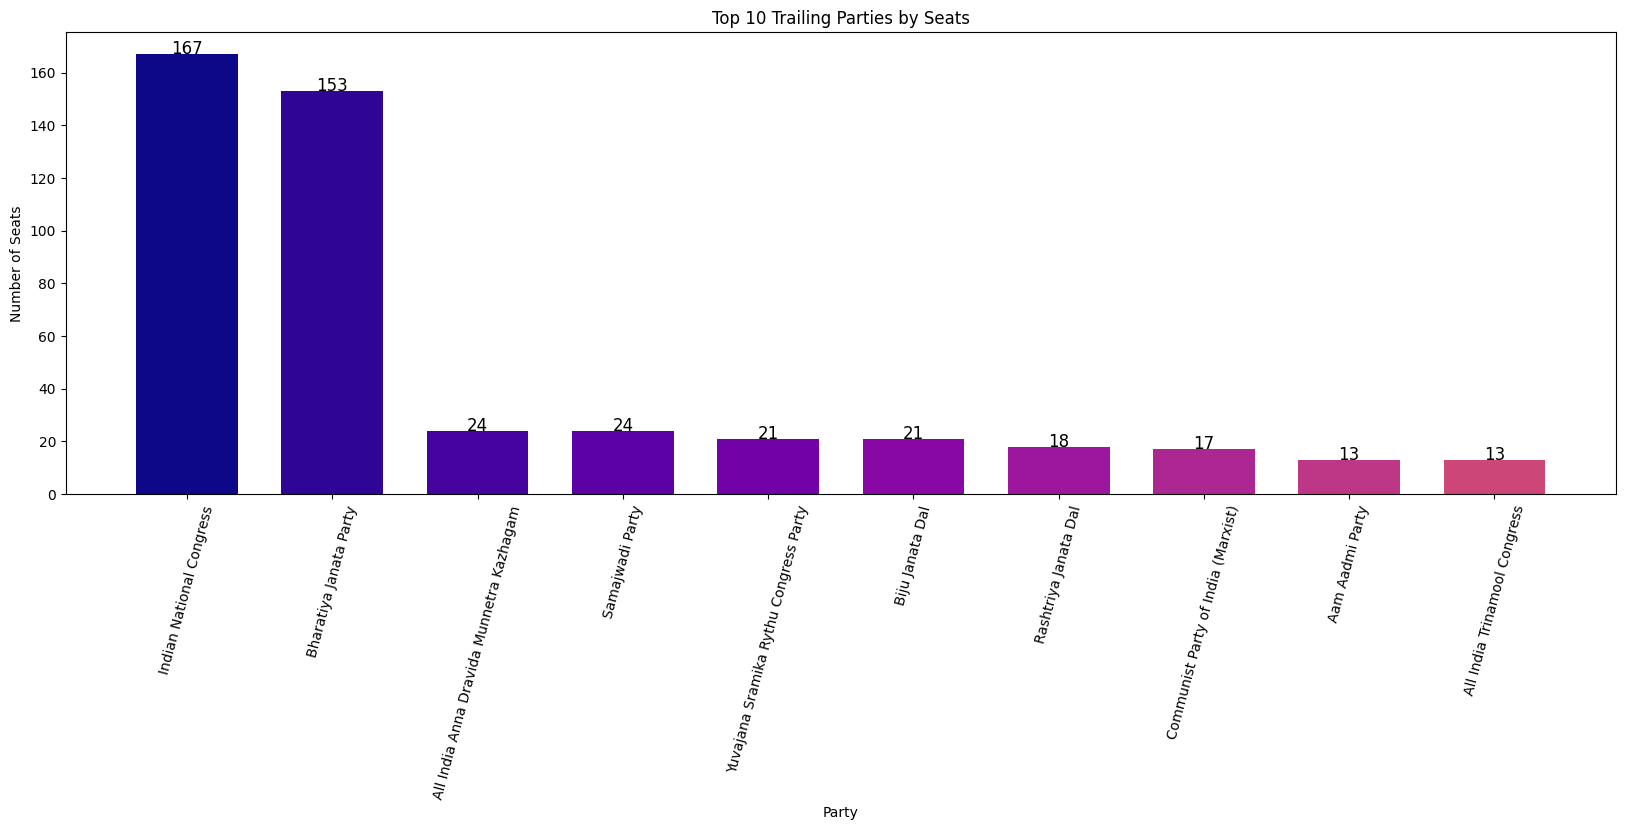

In [36]:
# Calculate the Number of Seats for Each Trailing Party
trailing_party_seats = data['Trailing Party'].value_counts().head(10)

# Create a Bar Chart for Leading Parties by Seats
plt.figure(figsize=(20, 6))
plt.bar(trailing_party_seats.index, trailing_party_seats.values, width= 0.7, color=plt.cm.plasma(np.linspace(0, 0.5, len(trailing_party_seats))))
for i, value in enumerate(trailing_party_seats.values):
    plt.text(i, value + 0.05, str(value), ha='center', fontsize=12)
plt.title('Top 10 Trailing Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation= 75)

plt.show()

Inference:  
The code visualizes the top 10 trailing parties by the number of seats, displaying the seat count in a bar chart with annotations.

# 9. Vote Margin Comparison Between Leading and Trailing Parties

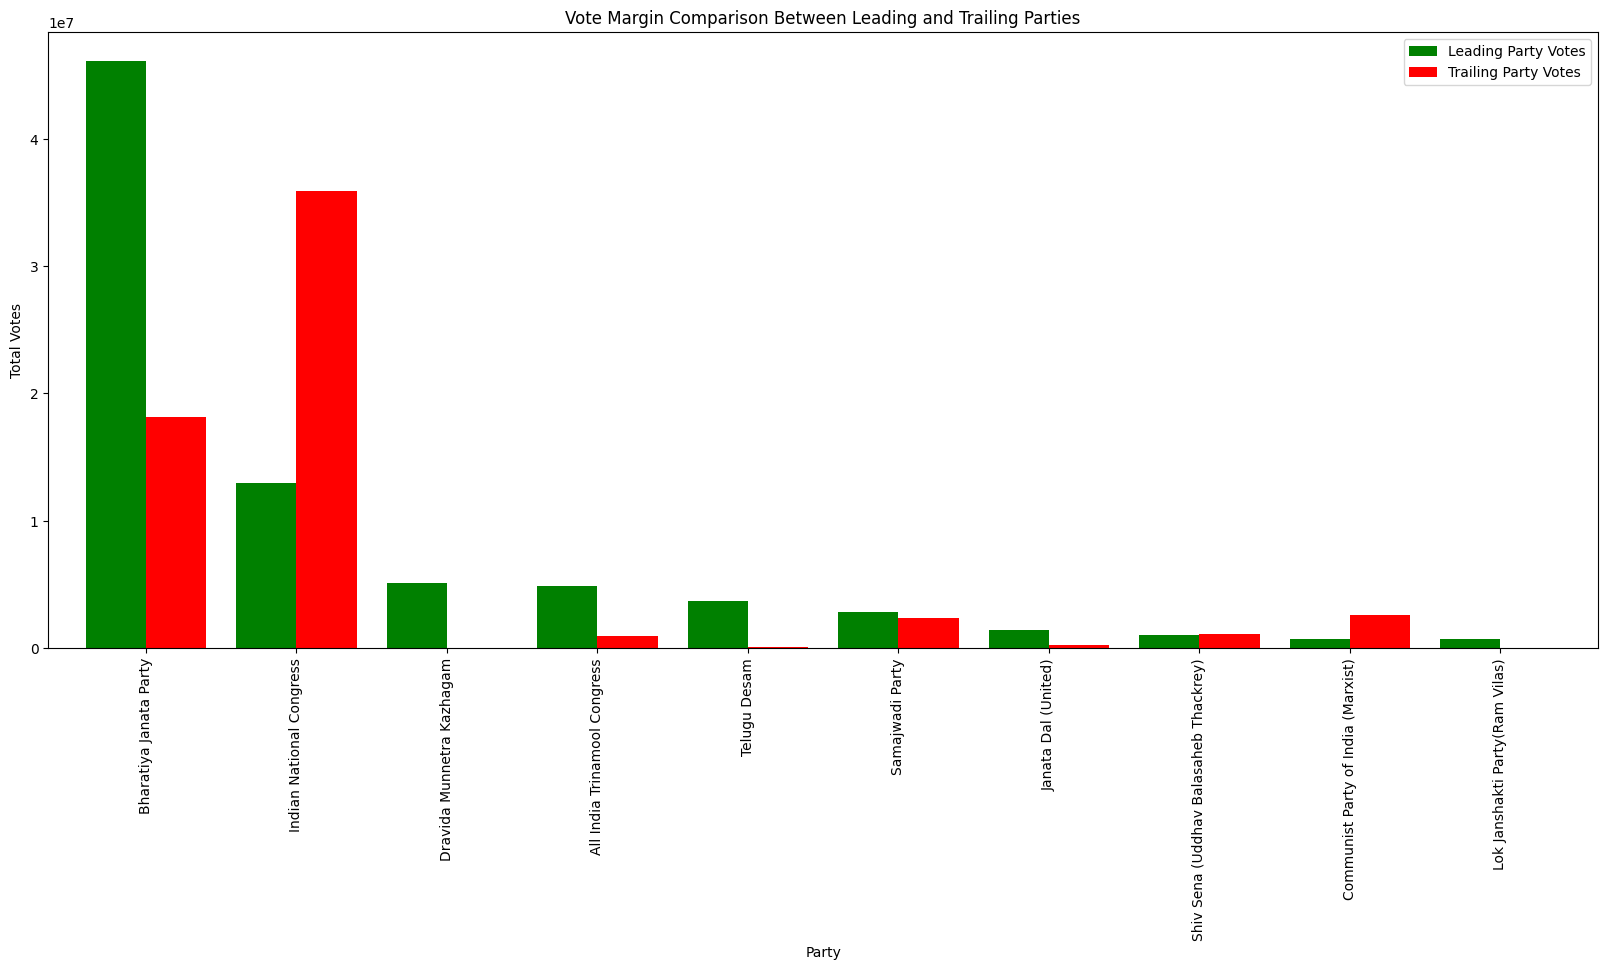

In [37]:
# Calculate the total votes for each Leading and Trailing Party
leading_party_margin = data.groupby('Leading Party')['Margin'].sum()
trailing_party_margin = data.groupby('Trailing Party')['Margin'].sum()

# Merge the two dataframes for comparison
party_comparison = pd.DataFrame({
    'Leading Party Votes': leading_party_margin,
    'Trailing Party Votes': trailing_party_margin
}).fillna(0)

# Sort the dataframe by leading party votes
party_comparison = party_comparison.sort_values(by='Leading Party Votes', ascending=False).head(10)

# Plot the comparison between leading and trailing parties
party_comparison.plot(kind='bar', figsize=(20, 8), width=0.8, color=['green', 'red'])
plt.title('Vote Margin Comparison Between Leading and Trailing Parties')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=90)
plt.show()


Inference:  
The plot compares the total vote margin (sum of margins) for leading and trailing parties. The green bars represent the leading parties, and the red bars represent the trailing parties.

# 10. Correlation between Vote Margin and Seats Won 

Correlation between Vote Margin and Seats Won: 0.99


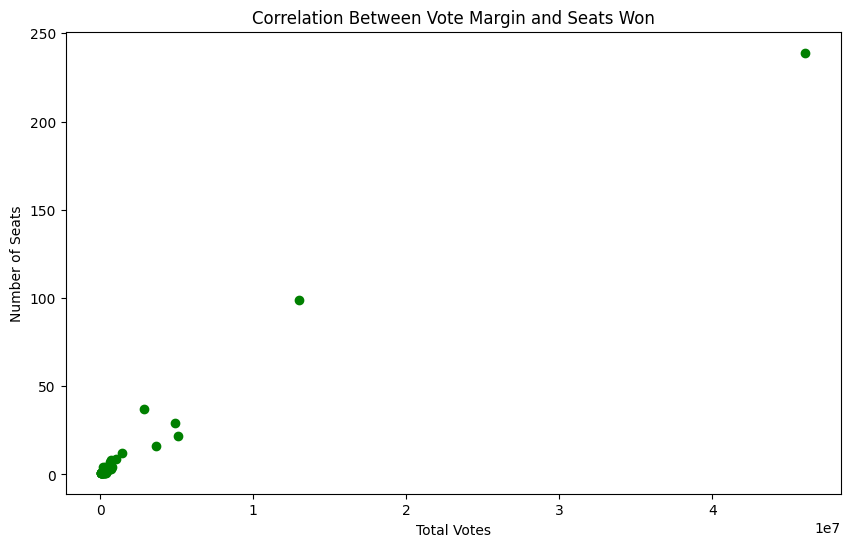

In [38]:
# Calculate the correlation between 'Margin' and 'Seats Won' by each party
party_seats = data.groupby('Leading Party')['Margin'].count()  
party_seats.name = 'Seats'

# Merge the seats data with the margin data
party_votes = data.groupby('Leading Party')['Margin'].sum()
party_data = pd.DataFrame({
    'Votes': party_votes,
    'Seats': party_seats
})

# Calculate correlation
correlation = party_data.corr().iloc[0, 1]
print(f"Correlation between Vote Margin and Seats Won: {correlation:.2f}")

# Scatter plot to visualize the correlation
plt.figure(figsize=(10, 6))
plt.scatter(party_data['Votes'], party_data['Seats'], color='green')
plt.title('Correlation Between Vote Margin and Seats Won')
plt.xlabel('Total Votes')
plt.ylabel('Number of Seats')
plt.show()


Inference:  
The scatter plot shows a strong positive correlation, with parties that win larger vote margins also securing more seats, indicating a pattern where higher votes consistently lead to higher seat counts.

# 11. Votes for specific leaders: Narendra Modi, Rahul Gandhi, and Amit Shah -

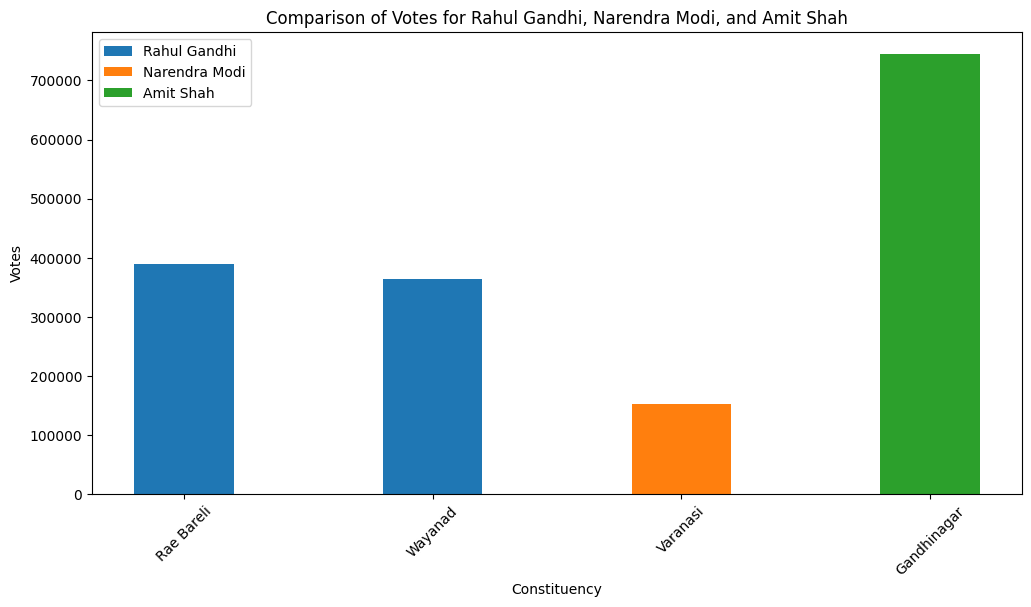

In [39]:
# Filter data for Candidates
rahul_entries = data[data['Leading Candidate'] == 'RAHUL GANDHI']
modi_entries = data[data['Leading Candidate'] == 'NARENDRA MODI']
amit_entries = data[data['Leading Candidate'] == 'AMIT SHAH']

# Extract votes for Rahul Gandhi, Narendra Modi, and Amit Shah
rahul_votes = rahul_entries['Margin'].values
modi_votes = modi_entries['Margin'].values[0] if not modi_entries.empty else 0
amit_votes = amit_entries['Margin'].values[0] if not amit_entries.empty else 0

# Extract Constituency names 
rahul_constituencies = list(rahul_entries['Constituency'])
modi_constituency = modi_entries['Constituency'].values[0] if not modi_entries.empty else "Modi Constituency"
amit_constituency = amit_entries['Constituency'].values[0] if not amit_entries.empty else "Amit Shah Constituency"

# Combine the data
data_to_plot = pd.DataFrame({
    'Candidate': ['Rahul Gandhi'] * len(rahul_votes) + ['Narendra Modi', 'Amit Shah'],
    'Constituency': rahul_constituencies + [modi_constituency, amit_constituency],
    'Votes': list(rahul_votes) + [modi_votes, amit_votes]
})

# Plot the comparison
plt.figure(figsize=(12, 6))
for candidate in data_to_plot['Candidate'].unique():
    candidate_data = data_to_plot[data_to_plot['Candidate'] == candidate]
    plt.bar(candidate_data['Constituency'], candidate_data['Votes'], width=0.4, label=candidate)
        
plt.title('Comparison of Votes for Rahul Gandhi, Narendra Modi, and Amit Shah')
plt.xlabel('Constituency')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.legend()

plt.show()

Inference:   
The bar chart compares the vote margins for Rahul Gandhi, Narendra Modi, and Amit Shah across constituencies, highlighting their electoral performance in each region.

# 12. Top Parties by Votes in Respective States

<Figure size 2000x1000 with 0 Axes>

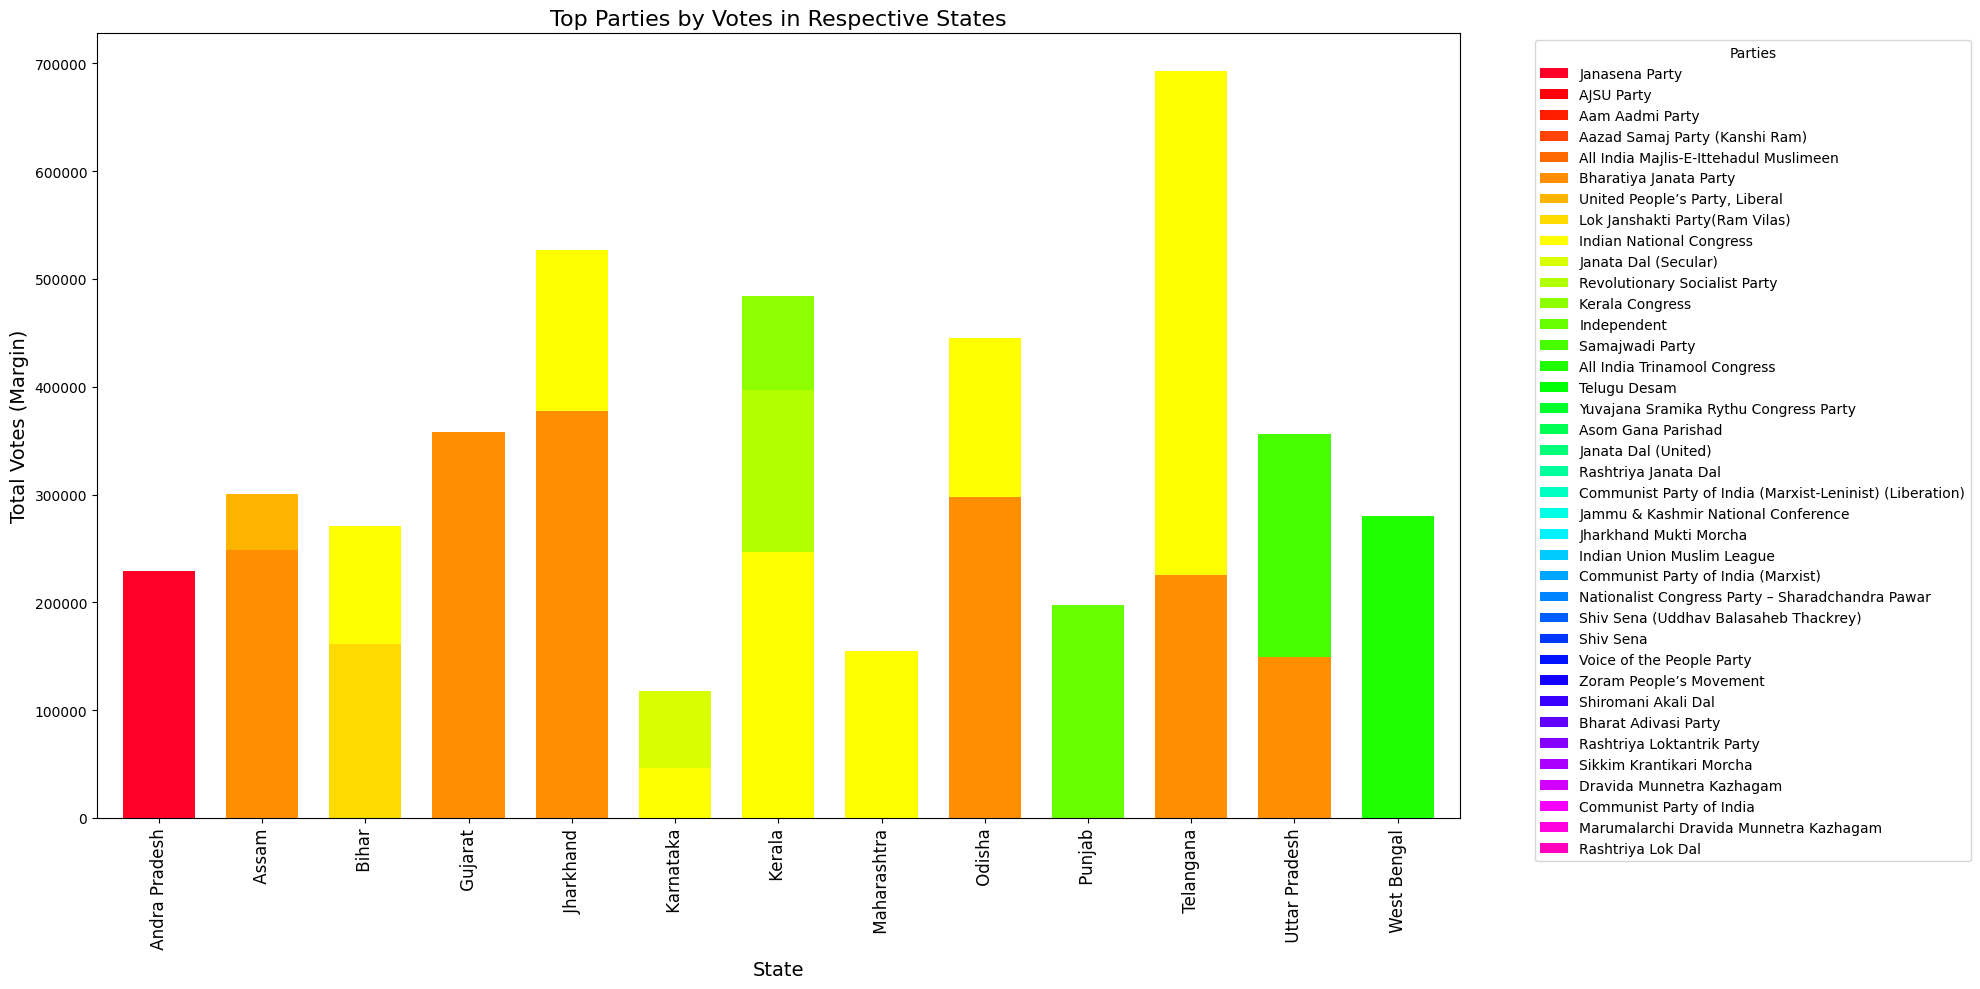

In [40]:
# Group data by 'State' and 'Leading Party', summing up the 'Margin' column
state_party_votes = merged_data.groupby(['State', 'Leading Party'])['Margin'].sum().unstack(fill_value=0)

# Selecting the Top Parties in Each State 
top_parties_per_state = state_party_votes.apply(
    lambda row: row.nlargest(5).index.tolist(), axis=1
).explode().unique()

# Filter the data to include only the top parties across states
filtered_state_party_votes = state_party_votes[top_parties_per_state].head(13)

# Plot the stacked bar chart
plt.figure(figsize=(20, 10))
filtered_state_party_votes.plot(
    kind='bar',
    stacked=True,
    figsize=(20, 10),
    width= 0.7,
    colormap= 'gist_rainbow'
)

plt.title('Top Parties by Votes in Respective States', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Votes (Margin)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.legend(title='Parties', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

plt.show()


Inference:  
The stacked bar chart visually represents the total vote margins for the top 5 political parties across various states, highlighting the leading parties in each state.

### Conclusion:
The analysis offers valuable insights into electoral dynamics, highlighting the distribution of seats and votes among political parties. Key findings include the identification of parties with the highest and lowest margins of victory, vote distribution patterns, and regional variations in party strength. The comparison between leading and trailing parties shows clear trends in electoral performance, with larger vote margins often correlating with more seats. Additionally, the project sheds light on the specific contributions of prominent leaders like Narendra Modi, Rahul Gandhi, and Amit Shah, providing a deeper understanding of their regional influence. The visualizations created throughout this analysis serve as effective tools for interpreting election data and offer a solid foundation for future political analyses.